####PART 3####
####In this part, you are required to train and test a simple CNN model for image classification.####

####import libraries####

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np


#### Download and import dataset CIFAR10 from https://www.cs.toronto.edu/~kriz/cifar.html#### 

In [ ]:
#write your code here, import and load dataset.
(dataTrain,dataTest),info=tfds.load('cifar10', split=['train','test'], with_info=True,as_supervised=True)



In [ ]:
#print number of classes with their names
for i in range(len(info.features['label'].names)):
  print("Class name: {} : Number asosiated with this class = {}".format(info.features["label"].int2str(i),info.features["label"].str2int(info.features["label"].int2str(i))))
  print("==================================================================================================")

#unique_with_counts

Class name: airplane : Number asosiated with this class = 0
Class name: automobile : Number asosiated with this class = 1
Class name: bird : Number asosiated with this class = 2
Class name: cat : Number asosiated with this class = 3
Class name: deer : Number asosiated with this class = 4
Class name: dog : Number asosiated with this class = 5
Class name: frog : Number asosiated with this class = 6
Class name: horse : Number asosiated with this class = 7
Class name: ship : Number asosiated with this class = 8
Class name: truck : Number asosiated with this class = 9


####Explore dataset####

###If you have import dataset correctly, there are 10 classes of images, there are total 60,000 images, 10,000 is for test and 50,000 for training####

In [ ]:
#your code here.
#print shape and length of your train,test iamges and their labels

print("Shape of training and Test Images {}".format(info.features['image'].shape))
print("Shape of labels {}".format(info.features['label'].shape))
print("Elements in the training set= {}".format(info.splits['train'].num_examples))
print("Elements in the test set= {}".format(info.splits['test'].num_examples))





Shape of training and Test Images (32, 32, 3)
Shape of labels ()
Elements in the training set= 50000
Elements in the test set= 10000


####Print random images from dataset####

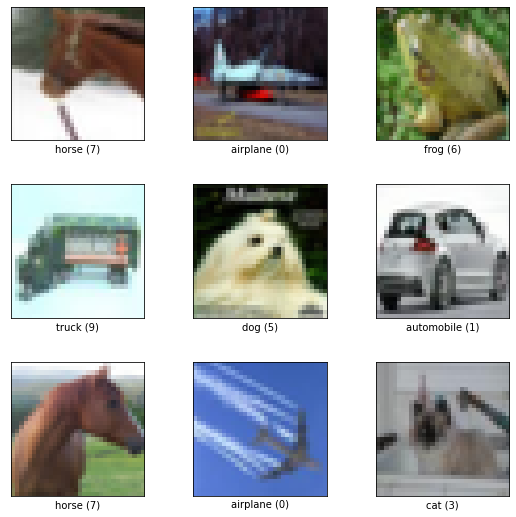

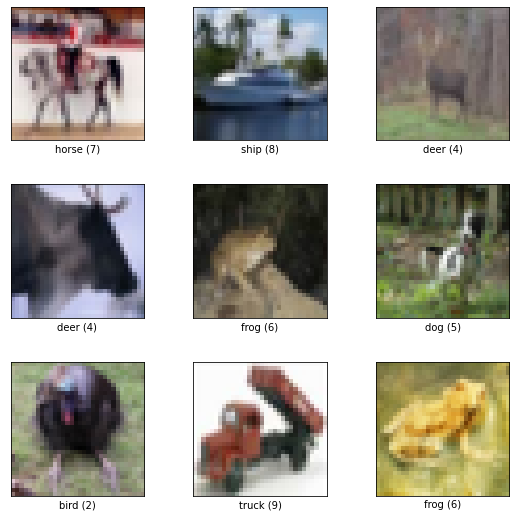

In [ ]:
#your code here
fig = tfds.show_examples(dataTest, info)
fig = tfds.show_examples(dataTrain, info)

####Normalize pixels between 0 and 1####

In [ ]:
#this code will not show any output. it will only change the pixel dimension from 0 to 255 to 0 to 1.
#nomalization function
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label

dataTrain_1 = dataTrain.map(
     normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
dataTrain_1 = dataTrain_1.cache()
# dataTrain_1 = dataTrain_1.shuffle(info.splits['train'].num_examples)
dataTrain_1 = dataTrain_1.batch(64)
dataTrain_1 = dataTrain_1.prefetch(tf.data.AUTOTUNE)

dataTest_1 = dataTest.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
dataTest_1 = dataTest_1.batch(64)
dataTest_1 = dataTest_1.prefetch(tf.data.AUTOTUNE)




####Dataset preview####

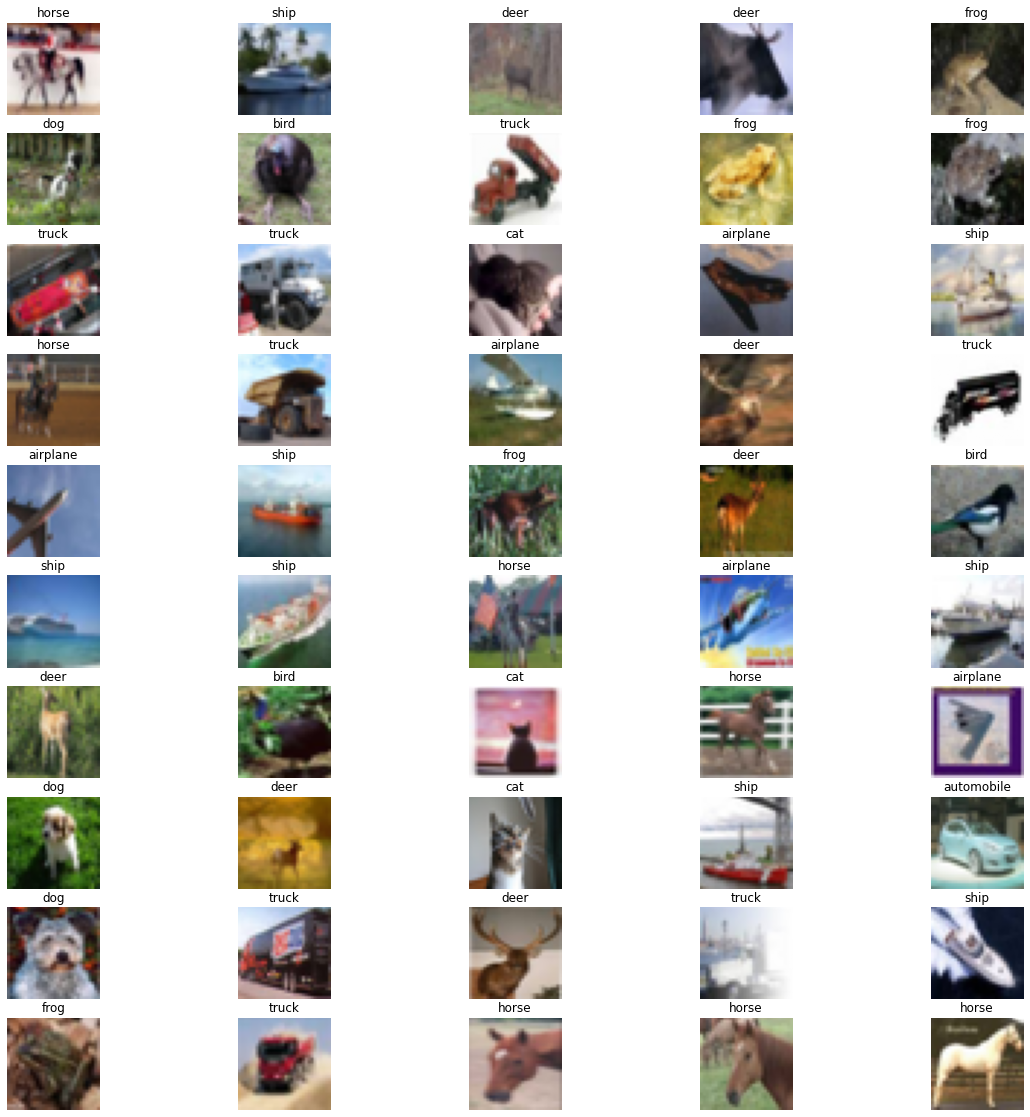

In [ ]:
#print atleast 50 images from dataset with their class names.

class_names=info.features['label'].names
plt.figure(figsize=(20, 20))
for images,labels in dataTrain_1.take(1):
    for i in range(50):
     ax=plt.subplot(10,5,i+1)
     plt.title(class_names[labels[i].numpy()])
     plt.imshow(images[i].numpy())
     plt.axis("off")



####Build simple convolutional neural network using conv2D and Maxpooling layers####

In [ ]:
#Your code here
model=keras.Sequential(
[
	keras.Input(shape=(32,32,3)),
	layers.Conv2D(32,3,padding='valid',activation='relu'),
	layers.MaxPooling2D(pool_size=(2,2)),
	layers.Conv2D(64,3,activation='relu'),
	layers.MaxPooling2D(),
	layers.Conv2D(128,3,activation='relu'),
	layers.Flatten(),
	layers.Dense(64,activation='relu'),
	layers.Dense(10)  
])

####Print model summary####

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

####Compile the model####

In [ ]:
from tensorflow.python import metrics
#Your code here
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    metrics=["accuracy"]



)

####Fit the model####

In [ ]:
#Your code here
history_Model=model.fit(dataTrain_1,batch_size=64,epochs=10,verbose=2,validation_data=dataTest_1)


Epoch 1/10
782/782 - 21s - loss: 1.6575 - accuracy: 0.3923 - val_loss: 1.4474 - val_accuracy: 0.4671 - 21s/epoch - 26ms/step
Epoch 2/10
782/782 - 4s - loss: 1.3381 - accuracy: 0.5229 - val_loss: 1.2997 - val_accuracy: 0.5268 - 4s/epoch - 6ms/step
Epoch 3/10
782/782 - 3s - loss: 1.2067 - accuracy: 0.5739 - val_loss: 1.1909 - val_accuracy: 0.5686 - 3s/epoch - 4ms/step
Epoch 4/10
782/782 - 3s - loss: 1.1064 - accuracy: 0.6098 - val_loss: 1.1191 - val_accuracy: 0.6018 - 3s/epoch - 4ms/step
Epoch 5/10
782/782 - 3s - loss: 1.0288 - accuracy: 0.6414 - val_loss: 1.0841 - val_accuracy: 0.6162 - 3s/epoch - 4ms/step
Epoch 6/10
782/782 - 3s - loss: 0.9669 - accuracy: 0.6647 - val_loss: 1.0446 - val_accuracy: 0.6297 - 3s/epoch - 4ms/step
Epoch 7/10
782/782 - 3s - loss: 0.9130 - accuracy: 0.6838 - val_loss: 1.0130 - val_accuracy: 0.6447 - 3s/epoch - 4ms/step
Epoch 8/10
782/782 - 3s - loss: 0.8647 - accuracy: 0.7002 - val_loss: 0.9837 - val_accuracy: 0.6588 - 3s/epoch - 4ms/step
Epoch 9/10
782/782 - 

####Evaluate the results####
####Evaluate the results and print on graphs####

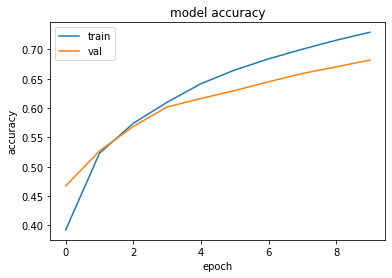

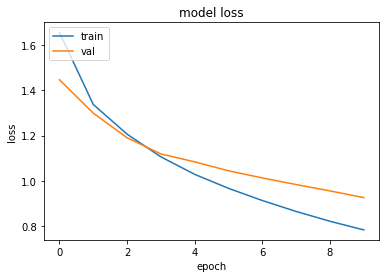

In [ ]:
#Your code here
#model.evaluate(dataTest_1)
import matplotlib.pyplot as plt
plt.plot(history_Model.history['accuracy'])
plt.plot(history_Model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_Model.history['loss'])
plt.plot(history_Model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [ ]:
!pip install autokeras

import autokeras as ak

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
reg = ak.ImageClassifier(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    
    max_trials = 1, 
    metrics = 'accuracy'
)
reg.fit(dataTrain_1,batch_size=64,epochs=10,validation_data=dataTest_1)


Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
resnet            |vanilla           |image_block_1/block_type
True              |True              |image_block_1/normalize
True              |False             |image_block_1/augment
True              |None              |image_block_1/image_augmentation_1/horizontal_flip
True              |None              |image_block_1/image_augmentation_1/vertical_flip
0                 |None              |image_block_1/image_augmentation_1/contrast_factor
0                 |None              |image_block_1/image_augmentation_1/rotation_factor
0.1               |None              |image_block_1/image_augmentation_1/translation_factor
0                 |None              |image_block_1/image_augmentation_1/zoom_factor
False             |None              |image_block_1/res_net_block_1/pretrained
resnet50          |None              |image_block_1/res_net_block_1/version
True              |None              |image_block

Epoch 1/10


KeyboardInterrupt: ignored

In [ ]:
classifer = ak.ImageClassifier(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    
    max_trials = 1, 
    metrics = 'accuracy'
)
classifer.fit(dataTrain_1,batch_size=64,epochs=10,validation_data=dataTest_1)


Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
resnet            |vanilla           |image_block_1/block_type
True              |True              |image_block_1/normalize
True              |False             |image_block_1/augment
True              |None              |image_block_1/image_augmentation_1/horizontal_flip
True              |None              |image_block_1/image_augmentation_1/vertical_flip
0                 |None              |image_block_1/image_augmentation_1/contrast_factor
0                 |None              |image_block_1/image_augmentation_1/rotation_factor
0.1               |None              |image_block_1/image_augmentation_1/translation_factor
0                 |None              |image_block_1/image_augmentation_1/zoom_factor
False             |None              |image_block_1/res_net_block_1/pretrained
resnet50          |None              |image_block_1/res_net_block_1/version
True              |None              |image_block

Epoch 1/10


276/782 [=========>....................] - ETA: 7:52 - loss: 2.0844 - accuracy: 0.2764

KeyboardInterrupt: ignored